In [73]:
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import kneighbors_graph
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


Homogeneity: 0.925
Completeness: 0.926
V-measure: 0.925
Adjusted Rand-Index: 0.919
Silhouette Coefficient: 0.553
Davies-Bouldin score: 0.587



/Users/Mamaka/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


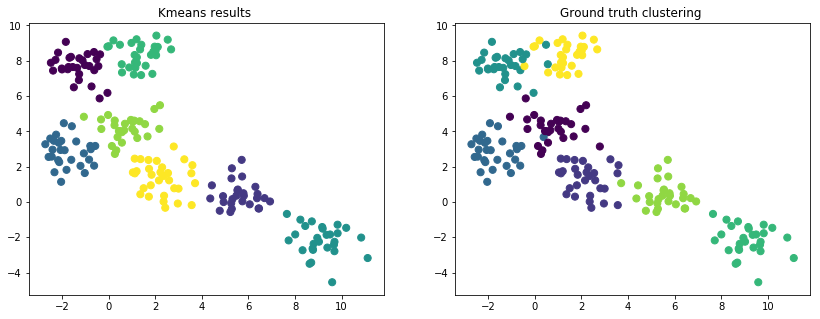

In [47]:
import time
import matplotlib.pyplot as pyplot
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

np.random.seed(0)

# Configuration options
num_samples_total = 200
cluster_centers = [(170,170),(150,150),(120,120),(102,102),(80,80),(66,66),(50,50), (35,35),(20,20), (4,4)]
num_classes = len(cluster_centers)

# Generate data

nb_clusters = 7


X, targets = make_blobs(n_samples = num_samples_total, centers = nb_clusters, cluster_std=.80, random_state=0)



k_means = KMeans(init='k-means++', n_clusters=nb_clusters, n_init=10)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels_unique = np.unique(k_means_labels)
p = k_means.predict(X)
clusters = np.unique(p)

plt.figure(figsize=(14,5))
plt.subplot(121)
plt.title(f'Kmeans results ')
plt.scatter(X[:, 0], X[:, 1], s=50, c = k_means_labels);

plt.subplot(122)
plt.title(f'Ground truth clustering ')
plt.scatter(X[:, 0], X[:, 1], s=50, c = targets);

print()
print("Homogeneity: %0.3f" % metrics.homogeneity_score(targets, k_means_labels))
print("Completeness: %0.3f" % metrics.completeness_score(targets, k_means_labels))
print("V-measure: %0.3f" % metrics.v_measure_score(targets, k_means_labels))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(targets, k_means_labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, k_means_labels, sample_size=200))
print("Davies-Bouldin score: %0.3f"
        % metrics.davies_bouldin_score(X, k_means_labels))
print()


Homogeneity: 0.970
Completeness: 0.353
V-measure: 0.517
Adjusted Rand-Index: 0.298
Silhouette Coefficient: 0.474
Davies-Bouldin score: 0.633



/Users/Mamaka/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


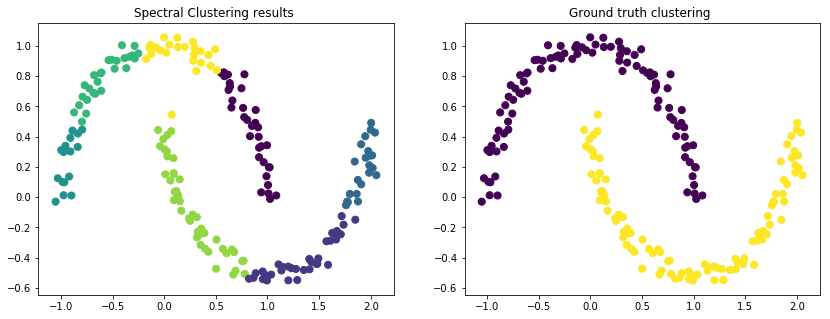

In [72]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering

n_clusters = 7
# Configuration options
num_samples_total = 200
# Generate data
X, targets = make_moons(n_samples = num_samples_total, noise=.05)

model = SpectralClustering(n_clusters=n_clusters, random_state=0)

model.fit(X)
#cluster_centers_indices = model.cluster_centers_indices_
#n_clusters_ = len(cluster_centers_indices)
# Predict the cluster for all the samples
#P = model.predict(X)

# Generate scatter plot for training data

clusters = np.unique(P)

plt.figure(figsize=(14,5))
plt.subplot(121)
plt.title(f'Spectral Clustering results ')
plt.scatter(X[:, 0], X[:, 1], s=50, c = model.labels_);

plt.subplot(122)
plt.title(f'Ground truth clustering ')
plt.scatter(X[:, 0], X[:, 1], s=50, c = targets);

print()
print("Homogeneity: %0.3f" % metrics.homogeneity_score(targets, model.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(targets, model.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(targets, model.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(targets,model.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, model.labels_, sample_size=200))
print("Davies-Bouldin score: %0.3f"
        % metrics.davies_bouldin_score(X, model.labels_))
print()

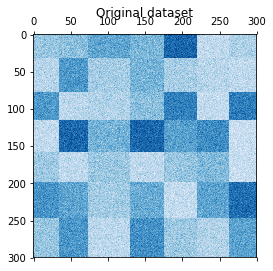

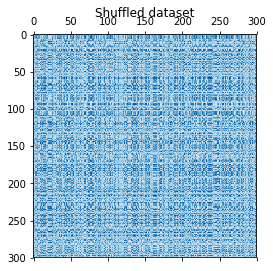

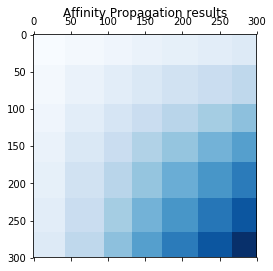

AttributeError: 'numpy.ndarray' object has no attribute 'labels_'

In [89]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_checkerboard
from sklearn.cluster import SpectralClustering
from sklearn.metrics import consensus_score
from sklearn.cluster import AffinityPropagation

n_clusters = 7
data, rows, columns = make_checkerboard(
    shape=(300, 300), n_clusters=n_clusters, noise=10,
    shuffle=False, random_state=0)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title(f"Original dataset")

# shuffle clusters
rng = np.random.RandomState(0)
row_idx = rng.permutation(data.shape[0])
col_idx = rng.permutation(data.shape[1])
data = data[row_idx][:, col_idx]

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")
model = AffinityPropagation(max_iter=250)
#model = SpectralClustering(n_clusters=n_clusters, random_state=0)
model.fit(data)

plt.matshow(np.outer(np.sort(model.labels_) + 1,
                     np.sort(model.labels_) + 1),
            cmap=plt.cm.Blues)
plt.title(f"Affinity Propagation results")

plt.show()


print( data.labels_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(data, model.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(data.shape[0], model.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(data.shape[0], model.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(data.shape[0],model.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(data, model.labels_, sample_size=300))
print("Davies-Bouldin score: %0.3f"
        % metrics.davies_bouldin_score(data, model.labels_))
print()